# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv("Admission_Predict.csv")

# Preprocessing

In [3]:
ds.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
ds.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [5]:
ds.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
threshold = 0.75

In [7]:
ds = ds.drop("Serial No.",axis = 1)

In [8]:
ds

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [9]:
ds.iloc[:,-1]=np.where(ds.iloc[:,-1]>threshold,1,0)

In [10]:
ds.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1.0
1,324,107,4,4.0,4.5,8.87,1,1.0
2,316,104,3,3.0,3.5,8.00,1,0.0
3,322,110,3,3.5,2.5,8.67,1,1.0
4,314,103,2,2.0,3.0,8.21,0,0.0


In [11]:
(ds==1).sum()

GRE Score              0
TOEFL Score            0
University Rating     26
SOP                    6
LOR                    1
CGPA                   0
Research             219
Chance of Admit      172
dtype: int64

In [12]:
X = ds.iloc[:,:-1].values
Y = ds.iloc[:,-1].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
Xtrain, Xtest, Ytrain,Ytest = train_test_split(X,Y,test_size=0.25,random_state =1)

# Model training

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

In [16]:
model_DT = DecisionTreeRegressor(random_state = 1)
model_RF = RandomForestRegressor(n_estimators = 100,random_state =1)
model_LR = LogisticRegression(solver = "lbfgs",max_iter=1000,random_state = 1)

In [17]:
model_DT.fit(Xtrain,Ytrain)
model_RF.fit(Xtrain,Ytrain)
model_LR.fit(Xtrain,Ytrain)

LogisticRegression(max_iter=1000, random_state=1)

In [18]:
Y_DT = model_DT.predict(Xtest)
Y_RF = model_RF.predict(Xtest)
Y_LR = model_LR.predict(Xtest)

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay , accuracy_score
from sklearn.metrics import classification_report

Text(0.5, 1.0, 'Decision Tree Regression')

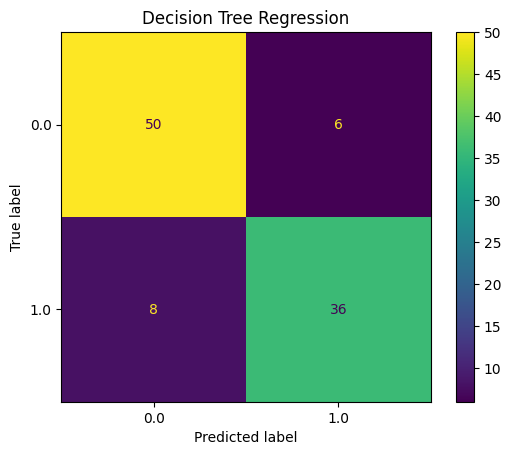

In [20]:
ConfusionMatrixDisplay.from_predictions(Ytest,Y_DT)
plt.title("Decision Tree Regression")

In [21]:
print(f"accuracy score : {accuracy_score(Ytest,Y_DT)}")
print(classification_report(Ytest,Y_DT))

accuracy score : 0.86
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88        56
         1.0       0.86      0.82      0.84        44

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



In [22]:
Y_RF = np.where(Y_RF>threshold,1,0)

Text(0.5, 1.0, 'Random Forest Regression')

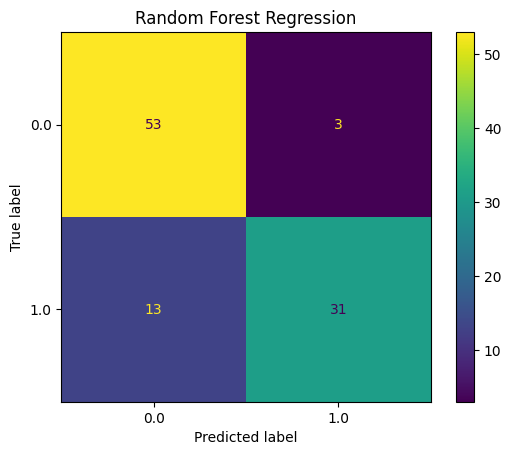

In [23]:
ConfusionMatrixDisplay.from_predictions(Ytest,Y_RF)
plt.title("Random Forest Regression")

In [24]:
print(f"accuracy score : {accuracy_score(Ytest,Y_RF)}")
print(classification_report(Ytest,Y_RF))

accuracy score : 0.84
              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87        56
         1.0       0.91      0.70      0.79        44

    accuracy                           0.84       100
   macro avg       0.86      0.83      0.83       100
weighted avg       0.85      0.84      0.84       100



Text(0.5, 1.0, 'Logistic Regression')

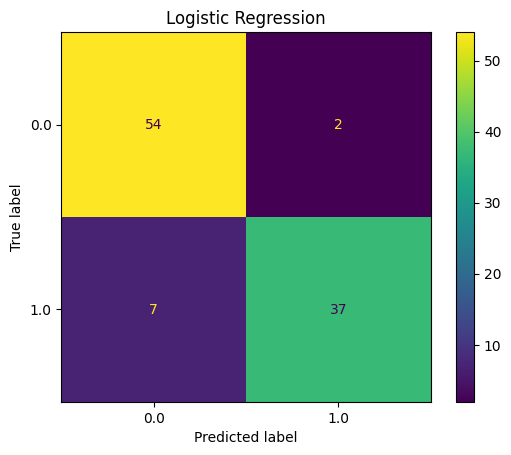

In [25]:
ConfusionMatrixDisplay.from_predictions(Ytest,Y_LR)
plt.title("Logistic Regression")

In [26]:
print(f"accuracy score : {accuracy_score(Ytest,Y_LR)}")
print(classification_report(Ytest,Y_LR))

accuracy score : 0.91
              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92        56
         1.0       0.95      0.84      0.89        44

    accuracy                           0.91       100
   macro avg       0.92      0.90      0.91       100
weighted avg       0.91      0.91      0.91       100

